<a href="https://colab.research.google.com/github/dookda/cmu_deep_learning/blob/main/YOLO8_sky_segmentation_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!mkdir sky_detect

In [ ]:
!unzip /content/drive/MyDrive/_DATASET/sky.v6i.yolov8.zip -d /content/sky_detect

In [5]:
!rm -r sky_detect/sky.v6i.yolov8/
!rm -r sky_detect/__MACOSX/

In [ ]:
!pip install ultralytics

`pip install pandas ultralytics numpy matplotlib seaborn pytest-warnings PyYAML random Pillow opencv-python`

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [7]:
sns.set(rc={'axes.facecolor': '#ffe4de'}, style='darkgrid')

In [9]:
dataDir = '/content/sky_detect/'

In [16]:
dataDir = os.path.join(os.getcwd(), 'sky.v6i.yolov8')
print(dataDir)

/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8


Text(0.5, 0.98, 'Random selection of Dataset Images')

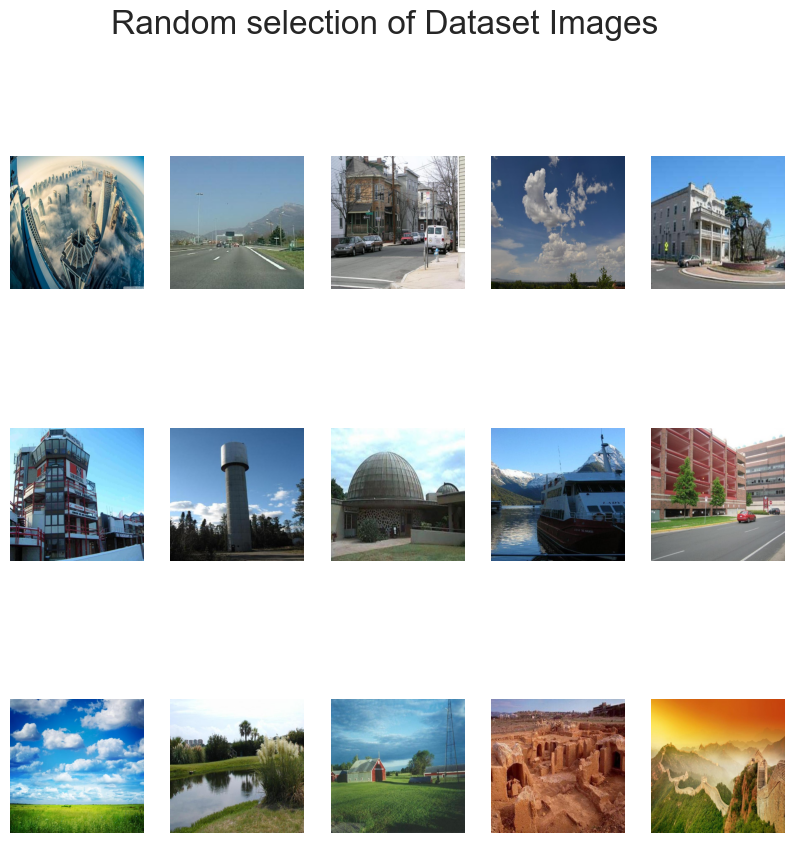

In [17]:
trainImagePath = os.path.join(dataDir, 'train', 'images')

imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10,10))

for i, image_file in enumerate(randomImages):
  image_path = os.path.join(trainImagePath, image_file)
  image = Image.open(image_path)
  plt.subplot(3, 5, i + 1)
  plt.imshow(image)
  plt.axis('off')

plt.suptitle('Random selection of Dataset Images', fontsize=24)

In [20]:
model = YOLO('yolov8n-seg.pt')

In [22]:
yamlFilePath = os.path.join(dataDir, 'data.yaml')
print(yamlFilePath)

/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/data.yaml


In [23]:
results = model.train(
    data=yamlFilePath,
    epochs=10,
    imgsz=640,
    batch=32,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    # device='cpu',
    device=0,
    seed=42
)

Ultralytics YOLOv8.2.6 🚀 Python-3.12.3 torch-2.3.0 CPU (Apple M2)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/data.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/labels... 1072 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1072/1072 [00:00<00:00, 3042.51it/s]

train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images/ADE_val_00000491_jpg.rf.968f72ae14f0ef791664f73e3db160cd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images/ADE_val_00000996_jpg.rf.ff29b1d0b368185db0a053929aff453d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images/ADE_val_00001112_jpg.rf.5c0a359a6ff67dd4c3267086a490c5dc.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images/ADE_val_00001300_jpg.rf.33a254b0ee7c90d89e27dcd0db2f5acd.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images/IMG_3542_jpg.rf.a587bce4c990fbb5ec427d7d47f61e55.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/train/images


val: Scanning /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 3674.94it/s]

val: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/valid/images/201105123338_jpg.rf.469ca696d23ff3d90e4da7daf3aa17cc.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/valid/images/2db321cf214a07ccb7aa59fa3e2773d4_jpg.rf.8b5c6a0ae2e686aa6b62b6a3f65b4882.jpg: 1 duplicate labels removed
val: New cache created: /Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/sky.v6i.yolov8/valid/labels.cache
Plotting labels to /opt/homebrew/runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /opt/homebrew/runs/segment/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.236      2.829      3.028      1.518         38        640: 100%|██████████| 34/34 [11:07<00:00, 19.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:45<00:00, 11.32s/it]

                   all        200        249     0.0245      0.775      0.112     0.0388     0.0242      0.767      0.127     0.0508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.223       1.96      2.366      1.479         39        640: 100%|██████████| 34/34 [1:02:26<00:00, 110.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:48<00:00, 12.13s/it]

                   all        200        249       0.44      0.552      0.378      0.195      0.398      0.538      0.343      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.234      1.832      2.125      1.494         24        640: 100%|██████████| 34/34 [17:15<00:00, 30.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:57<00:00, 14.25s/it]

                   all        200        249      0.348      0.534      0.295      0.168      0.327      0.502      0.252      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.287      1.863      1.957      1.549         26        640: 100%|██████████| 34/34 [23:50<00:00, 42.09s/it] 
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:42<00:00, 10.63s/it]

                   all        200        249      0.415      0.654      0.443       0.21      0.403      0.663      0.431      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G       1.19      1.706      1.702      1.441         22        640: 100%|██████████| 34/34 [16:37<00:00, 29.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:50<00:00, 12.67s/it]

                   all        200        249      0.468      0.502      0.407      0.235      0.374      0.361      0.231     0.0955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.101      1.596      1.582      1.369         55        640:  91%|█████████ | 31/34 [17:00<01:42, 34.02s/it]

In [15]:
bestModelPath = '/content/runs/segment/train/weights/best.pt'
bestModel = YOLO(bestModelPath)


image 1/1 /content/sky_detect/valid/images/36_jpg.rf.e3fa88a5fb4e201a1ab9541259c8c32c.jpg: 640x640 (no detections), 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/1640876410_51-celes-club-p-zimnii-pokhod-priroda-krasivo-foto-54_w900_h600_jpg.rf.c3f468dd10faf708d3d049a96e448734.jpg: 640x640 2 skys, 11.3ms
Speed: 1.5ms preprocess, 11.3ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/20230921_190252_jpg.rf.ed54c3daf35d6d6fc9fb5dcb8b88cf06.jpg: 640x640 2 skys, 12.4ms
Speed: 1.5ms preprocess, 12.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid/images/52358619301_64e860466a_o_jpg.rf.e7d5789bd296e2a5b5e167dc5cae9281.jpg: 640x640 2 skys, 11.5ms
Speed: 1.5ms preprocess, 11.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/sky_detect/valid

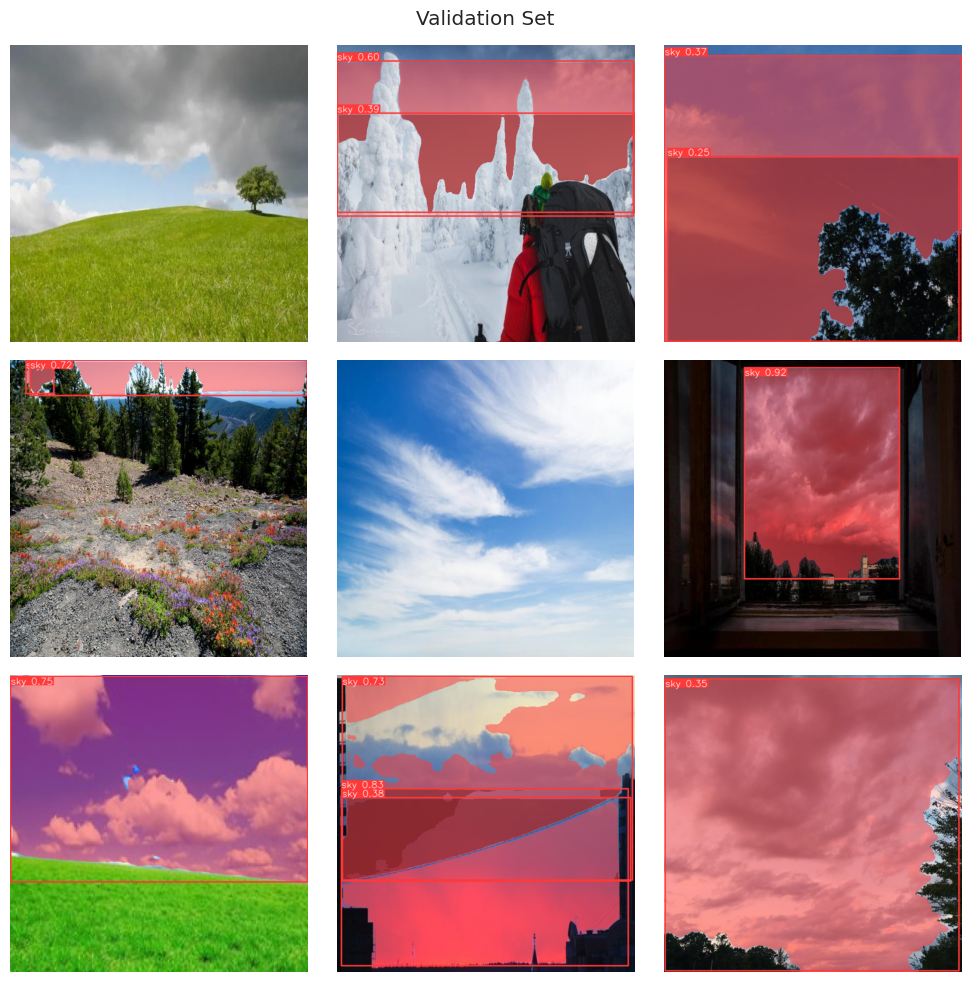

In [17]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()